In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def quadratic_variation2D(X, Y):
    msd2D = np.power(np.diff(X, axis=0, prepend=0.), 2) + np.power(np.diff(Y, axis=0, prepend=0.), 2)
    return np.cumsum(msd2D, axis=0)

In [3]:
def displacement2D_active(velocity=0.5, direction_changes_prob=0.01):
    n = 10000  # number of steps
    d = 10  # number of Brownian motion (samples)
    T = 1.0  # time
    times = np.linspace(0., T, n)
    dt = times[1] - times[0]
    
    # Initialize Brownian displacements
    dX = np.sqrt(dt) * np.random.normal(0, 1, size=(n - 1, d))
    dY = np.sqrt(dt) * np.random.normal(0, 1, size=(n - 1, d))
    
    # Active component: velocities and direction initialization
    theta = np.random.uniform(0, 2 * np.pi, size=d)  # Initial random directions
    vX = velocity * np.cos(theta)
    vY = velocity * np.sin(theta)
    
    X = np.zeros((n, d))
    Y = np.zeros((n, d))
    
    for i in range(1, n):
        # Update positions with both Brownian and active components
        X[i] = X[i - 1] + dX[i - 1] + vX * dt
        Y[i] = Y[i - 1] + dY[i - 1] + vY * dt
        
        # Randomly decide if the direction changes
        if np.random.rand() < direction_changes_prob:
            theta = np.random.uniform(0, 2 * np.pi, size=d)  # New random directions
            vX = velocity * np.cos(theta)
            vY = velocity * np.sin(theta)
    
    return times, X, Y

In [4]:
# Simulate the active Brownian motion
t2, X_disp, Y_disp = displacement2D_active()

In [5]:
def msd_function2D(time, D):
    return 4 * D * time

# Fitting the MSD
params, covariance = curve_fit(msd_function2D, t2, quadratic_variation2D(X_disp, Y_disp)[:, 0])
D = params[0]

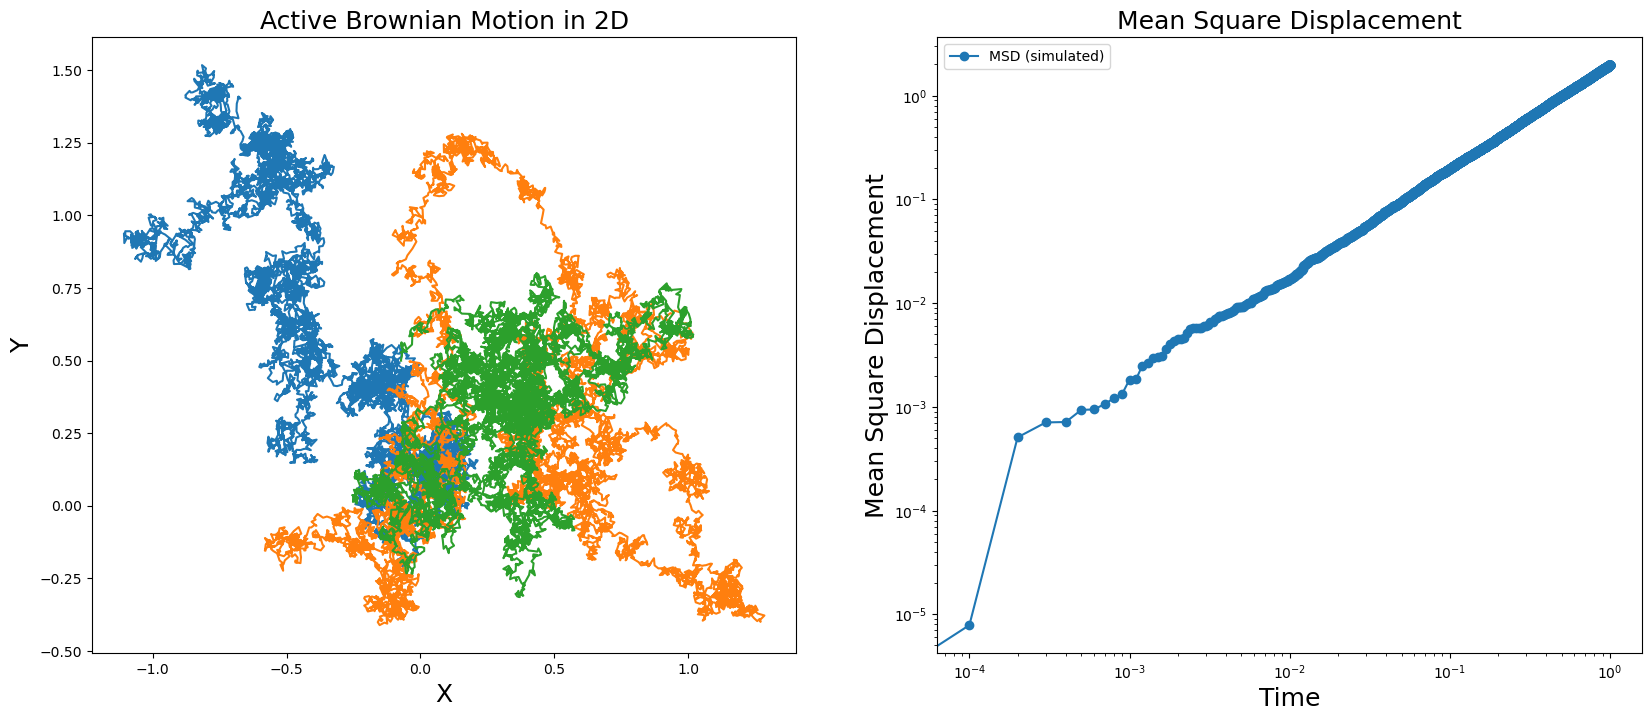

In [6]:
# Plotting the trajectories and MSD
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1.plot(X_disp[:, :3], Y_disp[:, :3], label='Particle trajectory')
ax2.plot(t2, quadratic_variation2D(X_disp, Y_disp)[:, 0], label='MSD (simulated)', marker='o')
#ax2.plot(t2, msd_function2D(t2, D), label=f'Fitted MSD (4Dt), D={D:.4f}', color='red')
ax1.set_xlabel("X", fontsize=18)
ax2.set_xlabel("Time", fontsize=18)
ax1.set_ylabel("Y", fontsize=18)
ax2.set_ylabel("Mean Square Displacement", fontsize=18)
ax1.set_title('Active Brownian Motion in 2D', fontsize=18)
ax2.set_title('Mean Square Displacement', fontsize=18)
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.legend()
plt.show()

In [7]:
def quadratic_variation2D(X,Y):
    msd2D = np.power(np.diff(X, axis=0, prepend=0.),2) + np.power(np.diff(Y, axis=0, prepend=0.),2)
    return np.cumsum(msd2D, axis=0)

In [8]:
def displacement2D():
    v_0 = 0.5
    n = 10000 # number of steps
    d = 10 # number of Brownian motion (samples)
    T = 1. # time
    times = np.linspace(0.,T,n)
    dt = times[1]-times[0]
    # X_t2 - X_t1 ~ Normal with mean 0 and variance t2-t1
    dX = v_0*np.cos(np.random.uniform(0, 2 * np.pi,size=(n-1,d)))*dt+np.sqrt(dt) * np.random.normal(0,1,size=(n-1, d))
    dY = v_0*np.sin(np.random.uniform(0, 2 * np.pi,size=(n-1,d)))*dt+np.sqrt(dt) * np.random.normal(0,1,size=(n-1, d))
    X_0 = np.zeros(shape=(1, d))
    X = np.concatenate((X_0, np.cumsum(dX, axis=0)), axis=0)
    Y = np.concatenate((X_0, np.cumsum(dY, axis=0)), axis=0)
    return times, X, Y

In [9]:
t2, X_disp, Y_disp = displacement2D()

In [10]:
def msd_function2D(time, D):
    return 4 * D * time

params, covariance = curve_fit(msd_function2D, t2, quadratic_variation2D(X_disp, Y_disp)[:,0])
D = params[0]

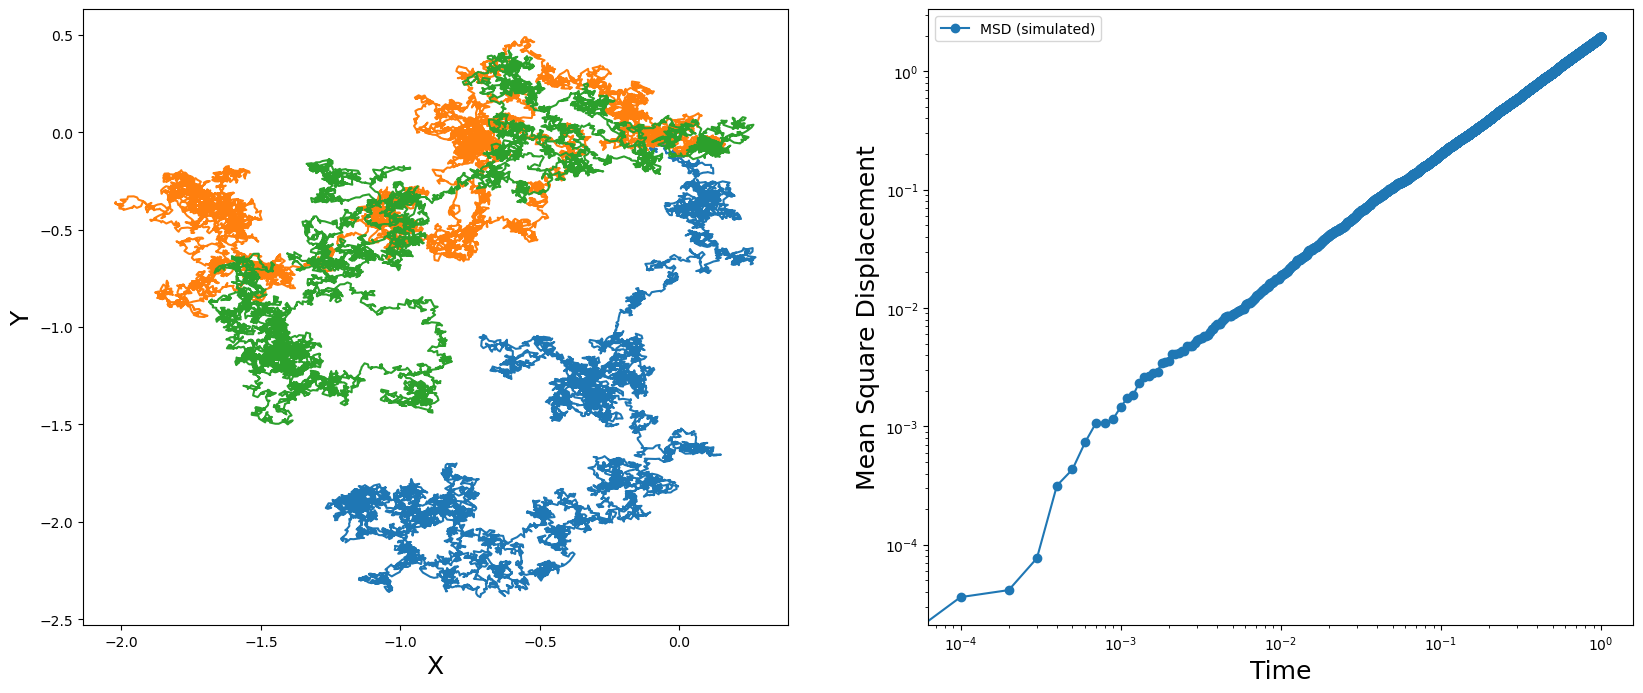

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))
ax1.plot(X_disp[:,:3], Y_disp[:,:3], label='Particle trajectory')
ax2.plot(t2, quadratic_variation2D(X_disp, Y_disp)[:,0], label='MSD (simulated)', marker='o')
#ax2.plot(t2, msd_function2D(t2, D), label=f'Fitted MSD (4Dt), D={D:.4f}', color='red')
ax1.set_xlabel("X", fontsize = 18)
ax2.set_xlabel("Time", fontsize = 18)
ax1.set_ylabel("Y", fontsize = 18)
ax2.set_ylabel("Mean Square Displacement", fontsize = 18)
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.legend()
plt.show()